In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


In [49]:

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [50]:
data_dict = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv")

country_df=pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')


In [51]:

print("Shape:", country_df.shape)
display(country_df.head())
display(data_dict)

Shape: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [52]:
print("\nMissing values per column:")
print(country_df.isnull().sum())


Missing values per column:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [53]:
pos_need = ['child_mort', 'inflation', 'total_fer']  # higher => worse

neg_need = ['income', 'gdpp', 'exports', 'imports', 'health', 'life_expec']  # higher => better

In [54]:
available_cols = set(country_df.columns)
for c in pos_need + neg_need:
    if c not in available_cols:
        raise ValueError(f"Expected column '{c}' not found in dataset")


In [55]:
scaler = StandardScaler()
to_scale = pos_need + neg_need
scaled = scaler.fit_transform(country_df[to_scale])
scaled_df = pd.DataFrame(scaled, columns=to_scale, index=country_df.index)

In [56]:
need_components = scaled_df.copy()

for col in neg_need:
    need_components[col] = -need_components[col]


country_df['need_score'] = need_components.mean(axis=1)   

ranked = country_df[['country', 'need_score'] + to_scale].sort_values('need_score', ascending=False).reset_index(drop=True)

top_n = 15
print(f"\nTop {top_n} countries needing aid (higher need_score => higher priority):")
display(ranked.head(top_n))


Top 15 countries needing aid (higher need_score => higher priority):


,country,need_score,child_mort,inflation,total_fer,income,gdpp,exports,imports,health,life_expec
0,Nigeria,2.011670,130.0,104.00,5.84,5150,2330,25.30,17.4,5.07,60.5
1,Central African Republic,1.198754,149.0,2.01,5.21,888,446,11.80,26.5,3.98,47.5
2,Haiti,1.138842,208.0,5.45,3.33,1500,662,15.30,64.7,6.91,32.1
3,Chad,1.025526,150.0,6.39,6.59,1930,897,36.80,43.5,4.53,56.5
4,Mali,1.006590,137.0,4.37,6.55,1870,708,22.80,35.1,4.98,59.5
5,Niger,0.965670,123.0,2.55,7.49,814,348,22.20,49.1,5.16,58.8
6,Angola,0.960174,119.0,22.40,6.16,5900,3530,62.30,42.9,2.85,60.1
7,Guinea,0.921149,109.0,16.10,5.34,1190,648,30.30,43.2,4.93,58.0
8,Burkina Faso,0.916174,116.0,6.81,5.87,1430,575,19.20,29.6,6.74,57.9
9,Eritrea,0.912025,55.2,11.60,4.61,1420,482,4.79,23.3,2.66,61.7


In [57]:
ranked['need_quantile'] = pd.qcut(ranked['need_score'], q=3, labels=['Low', 'Medium', 'High'])
print("\nDistribution across need categories:")
print(ranked['need_quantile'].value_counts())

print("\nCountries labelled as HIGH need:")
display(ranked[ranked['need_quantile']=='High'][['country','need_score']].reset_index(drop=True))


Distribution across need categories:
need_quantile
Low       56
High      56
Medium    55
Name: count, dtype: int64

Countries labelled as HIGH need:


,country,need_score
0,Nigeria,2.011670
1,Central African Republic,1.198754
2,Haiti,1.138842
3,Chad,1.025526
4,Mali,1.006590
5,Niger,0.965670
6,Angola,0.960174
7,Guinea,0.921149
8,Burkina Faso,0.916174
9,Eritrea,0.912025


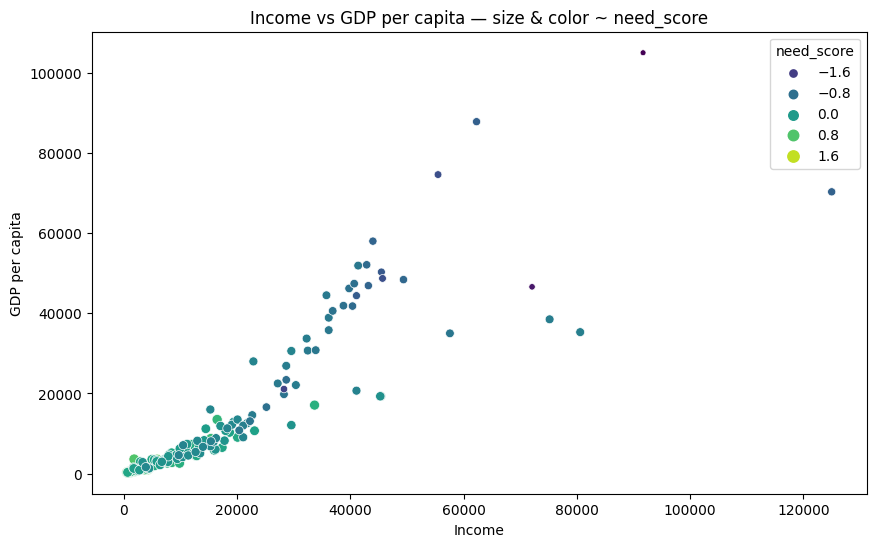

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ranked, x='income', y='gdpp', size='need_score', hue='need_score', palette='viridis', legend='brief')
plt.title('Income vs GDP per capita — size & color ~ need_score')
plt.xlabel('Income')
plt.ylabel('GDP per capita')
plt.show()

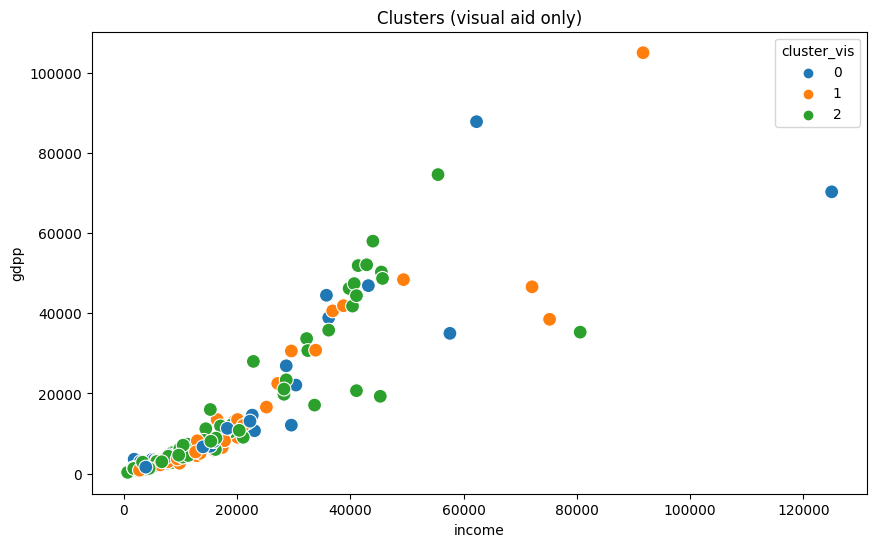


✅ Saved countries_need_ranking.csv


In [59]:

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
ranked['cluster_vis'] = kmeans.fit_predict(need_components)
plt.figure(figsize=(10,6))
sns.scatterplot(data=ranked, x='income', y='gdpp', hue='cluster_vis', palette='tab10', s=100)
plt.title('Clusters (visual aid only)')
plt.show()

ranked.to_csv("countries_need_ranking.csv", index=False)
print("\n✅ Saved countries_need_ranking.csv")
